In [48]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = [
'Class label',
'Alcohol ',
'Malic acid ',
'Ash ',
'Alcalinity of ash',
'Magnesium' ,
'Total phenols ',
'Flavanoids ',
'Nonflavanoid phenols ',
'Proanthocyanins' ,
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline'
]

In [49]:
from sklearn.cross_validation import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# 1.标准化

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

# 2.计算散布矩阵(Sb<类间散布矩阵>和Sw<类内散布矩阵>)

In [51]:
import numpy as np
np.set_printoptions(precision=4)

In [52]:
mean_vecs = []

In [53]:
for label in range(1, 4):
    mean_vecs.append(np.mean(
        X_train_std[y_train == label], axis=0
    ))

mean_vecs

[array([ 0.9259, -0.3091,  0.2592, -0.7989,  0.3039,  0.9608,  1.0515,
        -0.6306,  0.5354,  0.2209,  0.4855,  0.798 ,  1.2017]),
 array([-0.8727, -0.3854, -0.4437,  0.2481, -0.2409, -0.1059,  0.0187,
        -0.0164,  0.1095, -0.8796,  0.4392,  0.2776, -0.7016]),
 array([ 0.1637,  0.8929,  0.3249,  0.5658, -0.01  , -0.9499, -1.228 ,
         0.7436, -0.7652,  0.979 , -1.1698, -1.3007, -0.3912])]

In [54]:
d = 13 # number of features
S_W = np.zeros((d, d))

In [55]:
# for label, mv in zip(range(1, 4), mean_vecs):
#     class_scatter = np.zeros((d, d))
#     for row in X[y == label]:
#         row, mv = row.reshape(d, 1), mv.reshape(d, 1)
#         class_scatter += (row - mv).dot((row - mv).T)
    
#     S_W += class_scatter
    
# S_W[0]

In [56]:
S_W.shape

(13, 13)

In [57]:
X_1 = X_train_std[y_train == 1]
X_2 = X_train_std[y_train == 2]
X_3 = X_train_std[y_train == 3]

# print(X_1.T)
print(len(X_2))
print(len(X_3))

49
35


In [58]:
# S_W = np.cov(X_1.T) * 40 + np.cov(X_2.T) * 49 + np.cov(X_2.T) * 35
# S_W[0]

In [59]:
# S_W.shape

In [60]:
# d = 13 # number of features
# S_W = np.zeros((d, d))

In [61]:
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    # print(np.cov(X_train_std[y_train==label].T))
    S_W += class_scatter
    
S_W[0]

array([ 1.2458,  0.0514, -0.0329, -0.0895,  0.1155,  0.2454,  0.1501,
       -0.0557,  0.0991,  0.4879,  0.0238, -0.007 ,  0.1342])

In [62]:
mean_overall = np.mean(X_train_std, axis=0)

d = 13
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X[y==i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall.reshape(d, 1)
    
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
    
S_B.shape

(13, 13)

In [63]:
S_W[0]

array([ 1.2458,  0.0514, -0.0329, -0.0895,  0.1155,  0.2454,  0.1501,
       -0.0557,  0.0991,  0.4879,  0.0238, -0.007 ,  0.1342])

In [64]:
S_B[0]

array([ 1377.2393,   182.1787,   574.6657,  -709.3955,   408.8196,
         670.5792,   606.1913,  -358.6297,   213.815 ,   965.4504,
        -128.5446,   210.2302,  1378.5545])

In [65]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [66]:
eigens_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigens_pairs = sorted(eigens_pairs, key=lambda k: k[0], reverse=True)
# eigens_pairs
for eigen_val in eigens_pairs:
    print(eigen_val[0])

8359.1999965
2926.1307641
1.37845290737e-12
9.78330852402e-13
5.73312515658e-13
5.73312515658e-13
4.94232915763e-13
4.94232915763e-13
4.43286392667e-13
4.43286392667e-13
3.28949007661e-13
9.99563022435e-14
9.99563022435e-14


In [68]:
eigen_vals

array([  8.3592e+03 +0.0000e+00j,  -1.3785e-12 +0.0000e+00j,
         2.9261e+03 +0.0000e+00j,  -9.7833e-13 +0.0000e+00j,
        -4.4065e-13 +4.8261e-14j,  -4.4065e-13 -4.8261e-14j,
         3.2160e-13 +4.7461e-13j,   3.2160e-13 -4.7461e-13j,
         4.6121e-13 +1.7763e-13j,   4.6121e-13 -1.7763e-13j,
        -7.6080e-14 +6.4831e-14j,  -7.6080e-14 -6.4831e-14j,
         3.2895e-13 +0.0000e+00j])

In [67]:
tot = sum(eigen_vals.real)
tot

11285.33076060277

In [69]:
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
discr

[0.74071377913713721,
 0.25928622086286307,
 4.0868064931390002e-17,
 4.0868064931390002e-17,
 2.9148370981679983e-17,
 2.8497379958601219e-17,
 2.8497379958601219e-17,
 -6.741515479785434e-18,
 -6.741515479785434e-18,
 -3.9046394622612755e-17,
 -3.9046394622612755e-17,
 -8.6690489907290029e-17,
 -1.2214554775716371e-16]

In [70]:
cum_discr = np.cumsum(discr)
cum_discr

array([ 0.7407,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
        1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ])

/home/quoniam/anaconda2/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


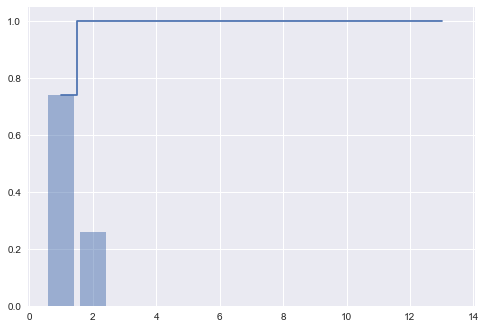

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.bar(range(1, 14), discr, alpha=.5, align='center')
plt.step(range(1, 14), cum_discr, where='mid')
plt.legend(loc='upper left')
plt.show()

/home/quoniam/anaconda2/envs/tensorflow/lib/python3.5/site-packages/numpy/core/numeric.py:533: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


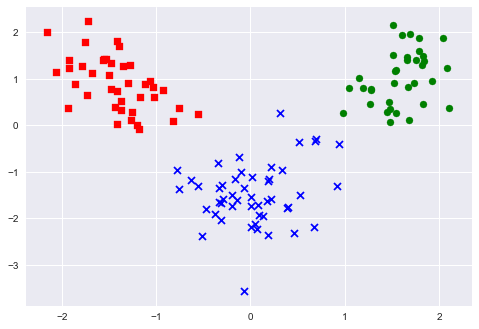

In [74]:
w = np.hstack((eigens_pairs[0][1][:, np.newaxis],
eigens_pairs[1][1][:, np.newaxis]))
X_train_lda = X_train_std.dot(w)
# 124 x 2
X_train_lda

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
        X_train_lda[y_train == l, 1],
        c=c, label=l, marker=m)
plt.show()

In [75]:
import sys
sys.path.append('../commonLib')